### process uavsar multi segment sierra line
jack tarricone
nov 16th start

In [1]:
%matplotlib inline
import isce
import os
import glob
import numpy as np
import shutil
from osgeo import gdal
import matplotlib.pyplot as plt
import rasterio as rio
from rasterio.plot import show # plotting raster data
from rasterio.plot import show_hist #histograms of raster data
from uavsar_pytools.georeference import geolocate_uavsar

2023-11-22 13:14:50,827 - rasterio.session - DEBUG - Could not import boto3, continuing with reduced functionality.


/Users/jtarrico/miniconda/envs/isce2_env/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/Users/jtarrico/miniconda/envs/isce2_env/lib/python3.9/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [ ]:
# get home dir
home = '/Users/jtarrico/'
os.chdir(home)
os.getcwd()

In [ ]:
# working folder name
isce_directory = 'sierra_isce_multi'
    
# path to folder
working_dir = os.path.join(home,isce_directory)

In [ ]:
# make new folder
# os.mkdir(working_dir)
print("Directory '%s' created" %isce_directory)

In [ ]:
# nativate to new folder
os.chdir(working_dir)
os.getcwd()

In [ ]:
## create subdirectories

# download
dl = 'download'
download_path = os.path.join(working_dir,dl)
# os.mkdir(download_path)

In [ ]:
# check folders were created
for file in os.listdir(working_dir):
    d = os.path.join(working_dir, file)
    if os.path.isdir(d):
        print(d)

# nativate to download folder
os.chdir(download_path)
os.getcwd()

## download

In [ ]:
# create .sh file from links

links = ['wget https://downloaduav2.jpl.nasa.gov/Release30/sierra_17305_01/sierra_17305_01_BC.dop',
'wget https://downloaduav2.jpl.nasa.gov/Release30/sierra_17305_01/sierra_17305_01_BC_s1_1x1.llh',
'wget https://downloaduav2.jpl.nasa.gov/Release30/sierra_17305_01/sierra_17305_01_BC_s1_1x1.lkv',
'wget https://downloaduav2.jpl.nasa.gov/Release30/sierra_17305_01/sierra_17305_01_BC_s2_1x1.llh',
'wget https://downloaduav2.jpl.nasa.gov/Release30/sierra_17305_01/sierra_17305_01_BC_s2_1x1.lkv',
'wget https://downloaduav2.jpl.nasa.gov/Release30/sierra_17305_01/sierra_17305_20002_001_200131_L090VV_01_BC.ann',
'wget https://downloaduav2.jpl.nasa.gov/Release30/sierra_17305_01/sierra_17305_20006_002_200212_L090VV_01_BC.ann',
'wget https://downloaduav2.jpl.nasa.gov/Release30/sierra_17305_01/sierra_17305_20009_023_200219_L090VV_01_BC.ann',
'wget https://downloaduav2.jpl.nasa.gov/Release30/sierra_17305_01/sierra_17305_20016_005_200311_L090VV_01_BC.ann',
'wget https://downloaduav2.jpl.nasa.gov/Release30/sierra_17305_01/sierra_17305_20014_000_200226_L090VV_01_BC.ann',
'wget https://downloaduav2.jpl.nasa.gov/Release30/sierra_17305_01/sierra_17305_20002_001_200131_L090VV_01_BC_s1_1x1.slc',
'wget https://downloaduav2.jpl.nasa.gov/Release30/sierra_17305_01/sierra_17305_20006_002_200212_L090VV_01_BC_s1_1x1.slc',
'wget https://downloaduav2.jpl.nasa.gov/Release30/sierra_17305_01/sierra_17305_20009_023_200219_L090VV_01_BC_s1_1x1.slc',
'wget https://downloaduav2.jpl.nasa.gov/Release30/sierra_17305_01/sierra_17305_20014_000_200226_L090VV_01_BC_s1_1x1.slc',
'wget https://downloaduav2.jpl.nasa.gov/Release30/sierra_17305_01/sierra_17305_20016_005_200311_L090VV_01_BC_s1_1x1.slc',
'wget https://downloaduav2.jpl.nasa.gov/Release30/sierra_17305_01/sierra_17305_20002_001_200131_L090VV_01_BC_s2_1x1.slc',
'wget https://downloaduav2.jpl.nasa.gov/Release30/sierra_17305_01/sierra_17305_20006_002_200212_L090VV_01_BC_s2_1x1.slc',
'wget https://downloaduav2.jpl.nasa.gov/Release30/sierra_17305_01/sierra_17305_20009_023_200219_L090VV_01_BC_s2_1x1.slc',
'wget https://downloaduav2.jpl.nasa.gov/Release30/sierra_17305_01/sierra_17305_20014_000_200226_L090VV_01_BC_s2_1x1.slc',
'wget https://downloaduav2.jpl.nasa.gov/Release30/sierra_17305_01/sierra_17305_20016_005_200311_L090VV_01_BC_s2_1x1.slc']

with open('downloads.sh', 'w') as f:
    for links in links:
        f.write(links)
        f.write('\n')

In [ ]:
# list files downloaded
for i in os.listdir(download_path):
    file = os.path.join(download_path, i)
    print(file)

## merge segments

add these scripts to the stripmapp folder

```pair.py``` \
```group_segments_dayhrmin_4isce.py``` \
```make_ifg_vrt_xml_isce.py``` \
```insar.py``` \
```make_slc_vrt_xml_isce.py``` \
```cat_and_interfere_py3.py``` \
```unpackFrame_UAVSAR_JPLcode.py``` 

In [ ]:
# nativate to new folder
os.chdir('./download')
os.getcwd()

In [ ]:
# read segments
! group_segments_dayhrmin_4isce.py . > images.json

In [ ]:
# generate ancillary files
! make_slc_vrt_xml_isce.py ./

In [ ]:
# create pairs .txt
! pair.py -n 1 < images.json > pairs.txt

In [ ]:
# form insar pairs at 8x2
! cat_and_interfere_py3.py -d int -r 2 -a 8 images.json pairs.txt

In [ ]:
# gen more anc files
! make_ifg_vrt_xml_isce.py -i int/

## test plot

In [ ]:
w_int = './int/20200131T1903_20200212T2211/20200131T1903_20200212T2211.int.vrt'
coh_path = './int/20200131T1903_20200212T2211/20200131T1903_20200212T2211.cor.vrt'

# read int
ds = gdal.Open(w_int, gdal.GA_ReadOnly)
igram = ds.GetRasterBand(1).ReadAsArray()
ds = None

# read
coh_ds = gdal.Open(coh_path, gdal.GA_ReadOnly)
coh = coh_ds.GetRasterBand(1).ReadAsArray()
coh_ds = None

fig = plt.figure(figsize=(18, 14))

ax = fig.add_subplot(1,3,1)
ax.imshow(np.abs(igram), vmin = 0, vmax = .3, cmap = 'gray')
ax.set_title("Magnitude")
ax.set_axis_off()

ax = fig.add_subplot(1,3,2)
ax.imshow(np.angle(igram), cmap = 'jet', vmax = 3.14, vmin = -3.14)
ax.set_title("Phase")
ax.set_axis_off()

ax = fig.add_subplot(1,3,3)
ax.imshow(coh, vmin = 0 , vmax = 1, cmap = 'gray')
ax.set_title("Coherence")
ax.set_axis_off()

# Phase Unwrapping

In [21]:
# start in downloads directory
os.chdir('/Users/jtarrico/sierra_isce_multi/')

In [ ]:
# create text file of date list
! ls --color=never int/ >> datelist.txt

In [ ]:
# print contents of that file
with open('datelist.txt') as f:
    lines = f.readlines()
    print(lines)

In [ ]:
! unwrap.py -h

In [ ]:
# run snaphu, this will take a while
! awk -F "_" '{print "unwrap.py -i int/"$1"_"$2"/"$1"_"$2".int -u int/"$1"_"$2"/"$1"_"$2".unw -c int/"$1"_"$2"/"$1"_"$2".coh -a 8 -r 2 -s download/"$1"/ -m snaphu"}' datelist.txt >> unwall.sh

In [ ]:
! sh unwall.sh

In [2]:
# start in downloads directory
os.chdir('/Users/jtarrico/sierra_isce_multi/')

In [78]:
# list files generated in unwrapping process
!ls int_orginal/*/*

int_orginal/20200131T1903_20200212T2211/20200131T1903_20200212T2211.amp
int_orginal/20200131T1903_20200212T2211/20200131T1903_20200212T2211.amp.vrt
int_orginal/20200131T1903_20200212T2211/20200131T1903_20200212T2211.amp.xml
int_orginal/20200131T1903_20200212T2211/20200131T1903_20200212T2211.coh
int_orginal/20200131T1903_20200212T2211/20200131T1903_20200212T2211.coh.vrt
int_orginal/20200131T1903_20200212T2211/20200131T1903_20200212T2211.coh.xml
int_orginal/20200131T1903_20200212T2211/20200131T1903_20200212T2211.int
int_orginal/20200131T1903_20200212T2211/20200131T1903_20200212T2211.int.vrt
int_orginal/20200131T1903_20200212T2211/20200131T1903_20200212T2211.int.xml
int_orginal/20200131T1903_20200212T2211/20200131T1903_20200212T2211.unw_snaphu.unw
int_orginal/20200131T1903_20200212T2211/20200131T1903_20200212T2211.unw_snaphu.unw.conncomp
int_orginal/20200131T1903_20200212T2211/20200131T1903_20200212T2211.unw_snaphu.unw.conncomp.vrt
int_orginal/20200131T1903_20200212T2211/20200131T1903_202

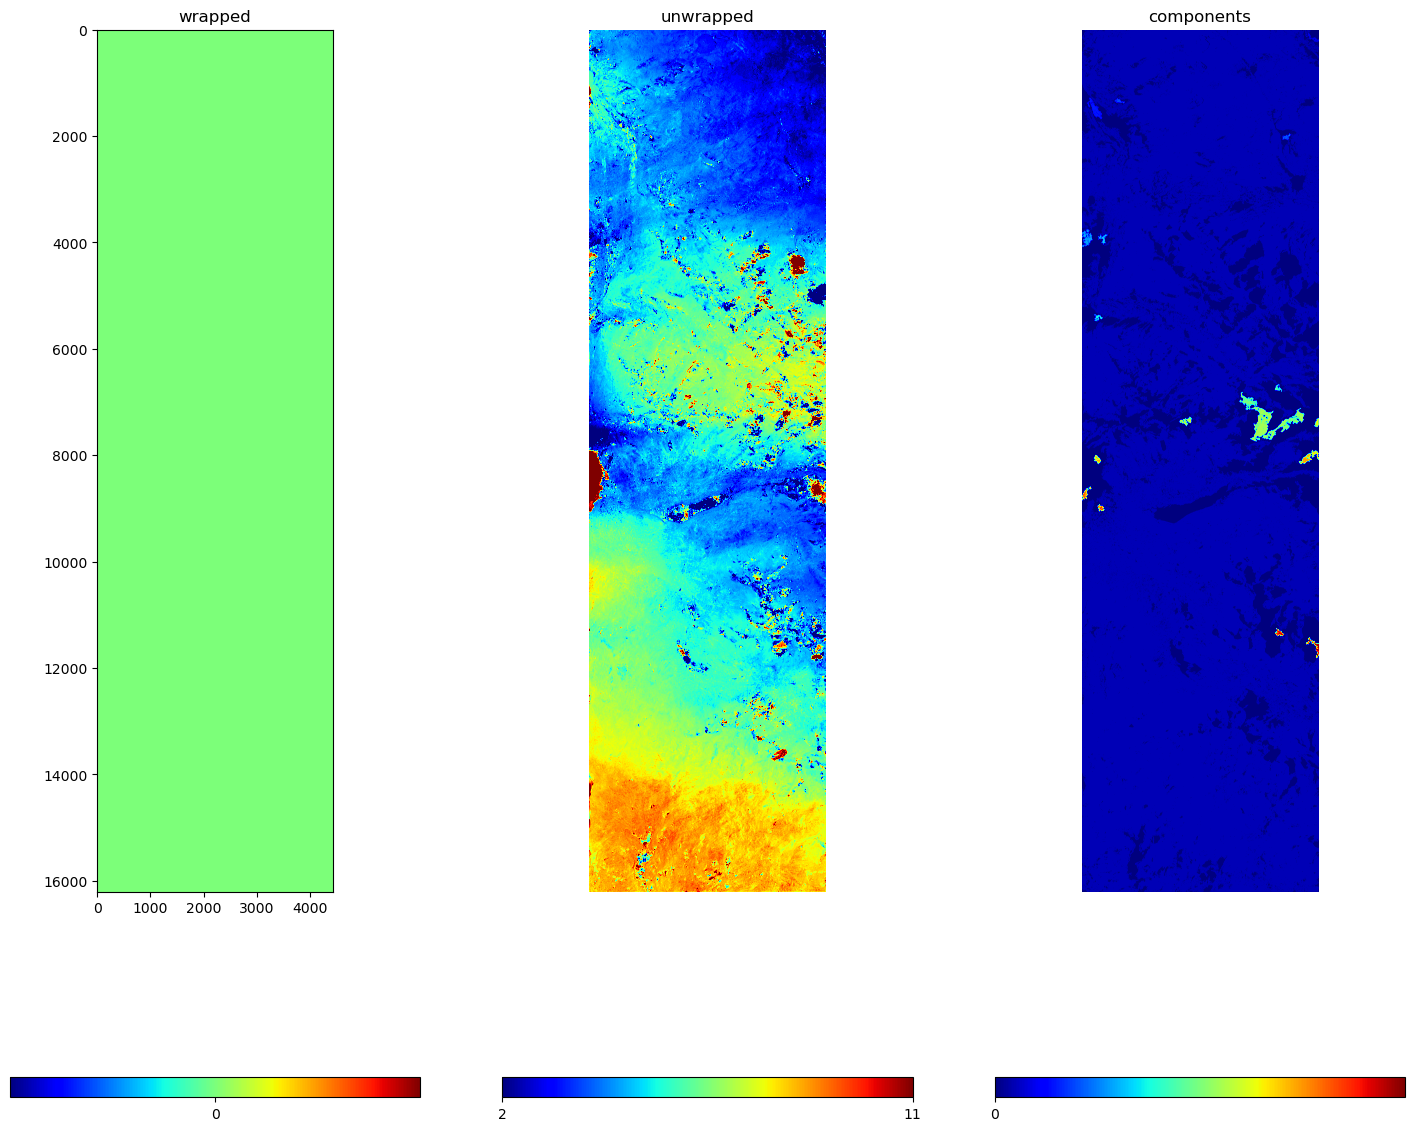

In [175]:
# plot

# reading the multi-looked wrapped interferogram
ds = gdal.Open("int_orginal/20200131T1903_20200212T2211/20200131T1903_20200212T2211.int", gdal.GA_ReadOnly)
igram = ds.GetRasterBand(1).ReadAsArray()
ds = None

# reading the multi-looked unwrapped interferogram
ds = gdal.Open("int_orginal/20200131T1903_20200212T2211/20200131T1903_20200212T2211.unw_snaphu.unw", gdal.GA_ReadOnly)
igram_unw = ds.GetRasterBand(2).ReadAsArray()
ds = None

# reading the connected component file
ds = gdal.Open("int_orginal/20200131T1903_20200212T2211/20200131T1903_20200212T2211.unw_snaphu.unw.conncomp", gdal.GA_ReadOnly)
connected_components = ds.GetRasterBand(1).ReadAsArray()
ds = None

fig = plt.figure(figsize=(18, 16))

ax = fig.add_subplot(1,3,1)
cax=ax.imshow(np.angle(igram), cmap='jet')
ax.set_title("wrapped")
#ax.set_axis_off()
cbar = fig.colorbar(cax, ticks=[-3.14,0,3.14],orientation='horizontal')
cbar.ax.set_xticklabels(["$-\pi$",0,"$\pi$"])

ax = fig.add_subplot(1,3,2)
cax = ax.imshow(igram_unw, vmin = 2, vmax = 11, cmap = 'jet')
ax.set_title("unwrapped")
ax.set_axis_off()
cbar = fig.colorbar(cax, ticks=[2,0,11], orientation='horizontal')


ax = fig.add_subplot(1,3,3)
cax = ax.imshow(connected_components, cmap = 'jet')
ax.set_title("components")
ax.set_axis_off()
cbar = fig.colorbar(cax, ticks=[0,21] , orientation='horizontal')
cbar.ax.set_xticklabels([0,21])


connected_components = None

In [80]:
! gdalinfo int_orginal/20200131T1903_20200212T2211/20200131T1903_20200212T2211.unw_snaphu.unw

Driver: ISCE/ISCE raster
Files: int_orginal/20200131T1903_20200212T2211/20200131T1903_20200212T2211.unw_snaphu.unw
       int_orginal/20200131T1903_20200212T2211/20200131T1903_20200212T2211.unw_snaphu.unw.xml
Size is 4437, 16212
Coordinate System is:
GEOGCRS["WGS 84",
    DATUM["World Geodetic System 1984",
        ELLIPSOID["WGS 84",6378137,298.257223563,
            LENGTHUNIT["metre",1]]],
    PRIMEM["Greenwich",0,
        ANGLEUNIT["degree",0.0174532925199433]],
    CS[ellipsoidal,2],
        AXIS["geodetic latitude (Lat)",north,
            ORDER[1],
            ANGLEUNIT["degree",0.0174532925199433]],
        AXIS["geodetic longitude (Lon)",east,
            ORDER[2],
            ANGLEUNIT["degree",0.0174532925199433]],
    ID["EPSG",4326]]
Data axis to CRS axis mapping: 2,1
Origin = (0.000000000000000,0.000000000000000)
Pixel Size = (1.000000000000000,1.000000000000000)
Corner Coordinates:
Upper Left  (   0.0000000,   0.0000000) (  0d 0' 0.01"E,  0d 0' 0.01"N)
Lower Left  (     

## geocode

In [2]:
from pathlib import Path
from glob import glob
import os
from uavsar_pytools.convert.tiff_conversion import read_annotation, array_to_tiff
from os.path import join, basename, dirname
from rasterio.vrt import WarpedVRT

# combine llh files
def combo_llhs(data_dir: Path, ann_fp: Path):
    """
    Combines segment .llh files into a single combined .llh file and saves as a binary with .vrt.
    """
    assert data_dir.exists()

    re_llhs = {'lat':[], 'lon': [], 'height':[]}
    for llh in sorted(data_dir.glob('*.llh')):
        segment = llh.stem.split('_')[-2].replace('s','')

        data = np.fromfile(llh, np.dtype('<f'))
        lat, lon, height = data[::3], data[1::3], data[2::3]
        for key, da in zip(re_llhs.keys(), [lat, lon, height]):
            re_llhs[key].extend(da)
                               
    full = np.empty(len(re_llhs['lat'])*3, dtype='>f')
    full[0::3] = re_llhs['lat']
    full[1::3] = re_llhs['lon']
    full[2::3] = re_llhs['height']

    # read ann file
    desc = read_annotation(ann_fp)
    print('reading .ann file')

    # read in number of rows from each llh file
    nrows1 = desc[f'llh_1_2x8.set_rows']['value']
    nrows2 = desc[f'llh_2_2x8.set_rows']['value']

    # add rows for new reshaping number
    nrows_new = nrows1 + nrows2
    print('new number of rows = ',nrows_new)
    
    # read in cols, same fo rboth
    ncols = desc[f'llh_1_2x8.set_cols']['value']
    dt = np.dtype('<f')

    # create empty arrays for lat and lon
    lat_array = np.empty((nrows_new, ncols))
    lon_array = np.empty((nrows_new, ncols))
    
    # fill each layer
    lat_array = full[::3].reshape(nrows_new, ncols)
    lon_array = full[1::3].reshape(nrows_new, ncols)

    # define path to bin file
    lat_output_file = data_dir / "multi_seg.lat"
    lon_output_file = data_dir / "multi_seg.lon"

    #### Save the array to bin file
    # lat
    lat_array.tofile(lat_output_file)
    print('.lat saved')
    # lon
    lon_array.tofile(lon_output_file)
    print('.lon saved')

    profile = {
    'driver': 'GTiff',
    'interleave': 'band',
    'tiled': False,
    'nodata': 0,
    'width': ncols,
    'height':nrows_new,
    'count':1,
    'dtype':'float32'
    }
    
    ### Save out tifs to be converted to vrt
    # lat
    with rio.open(join(str(lat_output_file) + '.tif'), 'w', **profile) as dst:
                dst.write(lat_array.astype(lat_array.dtype), 1)

    with rio.open(join(str(lon_output_file) + '.tif'), 'w', **profile) as dst:
                dst.write(lon_array.astype(lon_array.dtype), 1)

    # Add VRT file for each tif
    tifs = glob(join(data_dir, '*.tif')) # list all .llh files
    for tiff in tifs: # loop to open and translate .llh to .vrt, and save .vrt using gdal
        raster_dataset = gdal.Open(tiff, gdal.GA_ReadOnly) # read in rasters
        raster = gdal.Translate(join(data_dir, basename(tiff).replace('.tif','.vrt')), raster_dataset, format = 'VRT', outputType = gdal.GDT_Float32)
    raster_dataset = None

    print('new .lat and .lon with .vrt have saved')


In [3]:
dir = Path('./sierra_multi_seg_llh_zach')
ann = Path('./sierra_multi_seg_llh_zach/sierra_17305_20002_001_200131_L090VV_01_BC.ann')

In [28]:
full = combo_llhs(data_dir = dir, ann_fp = ann)

reading .ann file
new number of rows =  16212
.lat saved
.lon saved
2023-11-22 10:45:56,928 - rasterio.env - DEBUG - Entering env context: <rasterio.env.Env object at 0x345466130>
2023-11-22 10:45:56,929 - rasterio.env - DEBUG - Starting outermost env
2023-11-22 10:45:56,931 - rasterio.env - DEBUG - No GDAL environment exists
2023-11-22 10:45:56,932 - rasterio.env - DEBUG - New GDAL environment <rasterio._env.GDALEnv object at 0x345579850> created
2023-11-22 10:45:56,933 - rasterio._env - DEBUG - GDAL_DATA found in environment.
2023-11-22 10:45:56,934 - rasterio._env - DEBUG - PROJ_DATA found in environment.
2023-11-22 10:45:56,935 - rasterio._env - DEBUG - Started GDALEnv: self=<rasterio._env.GDALEnv object at 0x345579850>.
2023-11-22 10:45:56,937 - rasterio.env - DEBUG - Entered env context: <rasterio.env.Env object at 0x345466130>
2023-11-22 10:45:56,938 - rasterio._io - DEBUG - Path: _UnparsedPath(path='sierra_multi_seg_llh_zach/multi_seg.lat.tif'), mode: w, driver: GTiff
2023-11-2

/Users/jtarrico/miniconda/envs/isce2_env/lib/python3.9/site-packages/rasterio/__init__.py:314: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = writer(


2023-11-22 10:45:57,844 - rasterio.env - DEBUG - Exiting env context: <rasterio.env.Env object at 0x3454667f0>
2023-11-22 10:45:57,845 - rasterio.env - DEBUG - Cleared existing <rasterio._env.GDALEnv object at 0x19b25a070> options
2023-11-22 10:45:57,846 - rasterio._env - DEBUG - Stopped GDALEnv <rasterio._env.GDALEnv object at 0x19b25a070>.
2023-11-22 10:45:57,847 - rasterio.env - DEBUG - Exiting outermost env
2023-11-22 10:45:57,849 - rasterio.env - DEBUG - Exited env context: <rasterio.env.Env object at 0x3454667f0>
2023-11-22 10:45:57,850 - rasterio.env - DEBUG - Entering env context: <rasterio.env.Env object at 0x345466190>
2023-11-22 10:45:57,851 - rasterio.env - DEBUG - Starting outermost env
2023-11-22 10:45:57,852 - rasterio.env - DEBUG - No GDAL environment exists
2023-11-22 10:45:57,853 - rasterio.env - DEBUG - New GDAL environment <rasterio._env.GDALEnv object at 0x345466130> created
2023-11-22 10:45:57,854 - rasterio._env - DEBUG - GDAL_DATA found in environment.
2023-11-2

In [19]:
# path to your unw.vrt
in_fp = 'int_orginal/20200131T1903_20200212T2211/20200131T1903_20200212T2211.unw_snaphu.unw'

# path to annotation file
lat_fp = '/Users/jtarrico/sierra_isce_multi/sierra_multi_seg_llh_zach/multi_seg.lat.vrt'

# path to annotation file
lon_fp = '/Users/jtarrico/sierra_isce_multi/sierra_multi_seg_llh_zach/multi_seg.lon.vrt'

# where the .tif is being save
out_fp = '/Users/jtarrico/sierra_isce_multi/sierra_multi_seg_llh_zach/0200131T1903_20200212T2211.unw_snaphu.unw.tif'

In [22]:
from osgeo import gdal, osr

def geocodeUsingGdalWarp(infile, latfile, lonfile, outfile,
                         insrs=4326, outsrs=None,
                         spacing=None, fmt='GTiff', bounds=None,
                         method='near'):
    '''
    From: Dr. Gareth Funning, UC Riverside, UNAVCO InSAR Short Course
    Geocode a swath file using corresponding lat, lon files
    '''
    sourcexmltmpl = '''    <SimpleSource>
      <SourceFilename>{0}</SourceFilename>
      <SourceBand>{1}</SourceBand>
    </SimpleSource>'''
    
    driver = gdal.GetDriverByName('VRT')
    tempvrtname = 'temp_ele.vrt'
    ds = gdal.OpenShared(infile, gdal.GA_ReadOnly)
    inds1 = ds.GetRasterBand(1).ReadAsArray()
    tempds = driver.Create(tempvrtname, inds1.shape[1], inds1.shape[0], 0)
    
    #for ii in range(inds.RasterCount):
    band = ds.GetRasterBand(1)
    tempds.AddBand(band.DataType)
    tempds.GetRasterBand(1).SetMetadata({'source_0': sourcexmltmpl.format(infile, 1)}, 'vrt_sources')
  
    sref = osr.SpatialReference()
    sref.ImportFromEPSG(insrs)
    srswkt = sref.ExportToWkt()
    tempds.SetMetadata({'SRS' : srswkt,
                        'X_DATASET': lonfile,
                        'X_BAND' : '1',
                        'Y_DATASET': latfile,
                        'Y_BAND' : '1',
                        'PIXEL_OFFSET' : '0',
                        'LINE_OFFSET' : '0',
                        'PIXEL_STEP' : '1',
                        'LINE_STEP' : '1'}, 
                        'GEOLOCATION')
    
    band = None
    tempds = None 
    inds = None
    
    if spacing is None:
        spacing = [None, None]
    warpOptions = gdal.WarpOptions(format=fmt,
                                xRes=spacing[0], yRes=spacing[0],
                                dstSRS=outsrs, outputBounds = bounds, dstNodata = -9999,
                                resampleAlg=method, geoloc=True)
    gdal.Warp(outfile, tempvrtname, options=warpOptions)
    os.remove('temp_ele.vrt')

In [23]:
geocodeUsingGdalWarp(infile = in_fp,
                     latfile = lat_fp, 
                     lonfile = lon_fp, 
                     outfile = out_fp,
                     insrs=4326, outsrs=None,spacing=[.00005556,.00005556], fmt='GTiff', bounds=None,method='near')

In [20]:
# Open the VRT dataset
dataset = gdal.Open(in_fp, gdal.GA_ReadOnly)
gdal.Info(dataset)

ERROR 4: int_orginal/20200131T1903_20200212T2211/20200131T1903_20200212T2211.unw_snaphu.unw.vrt: No such file or directory


In [16]:
!gdalinfo /Users/jtarrico/sierra_isce_multi/sierra_multi_seg_llh_zach/20200131T1903_20200212T2211.unw_snaphu.unw.vrt

Driver: VRT/Virtual Raster
Files: /Users/jtarrico/sierra_isce_multi/sierra_multi_seg_llh_zach/20200131T1903_20200212T2211.unw_snaphu.unw.vrt
       /Users/jtarrico/sierra_isce_multi/sierra_multi_seg_llh_zach/20200131T1903_20200212T2211.unw_snaphu.unw
Size is 4437, 16212
Corner Coordinates:
Upper Left  (    0.0,    0.0)
Lower Left  (    0.0,16212.0)
Upper Right ( 4437.0,    0.0)
Lower Right ( 4437.0,16212.0)
Center      ( 2218.5, 8106.0)
Band 1 Block=4437x1 Type=Float32, ColorInterp=Undefined


In [17]:
# Open the VRT dataset
dataset = gdal.Open(in_fp, gdal.GA_ReadOnly)
print(dataset.GetRasterBand(1).RasterXsize)

ERROR 4: int_orginal/20200131T1903_20200212T2211/20200131T1903_20200212T2211.unw_snaphu.unw: No such file or directory


AttributeError: 'NoneType' object has no attribute 'GetRasterBand'

In [165]:
dataset.RasterCount

2